In [1]:
import matplotlib.pyplot as plt

from keras.datasets import mnist

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline

2023-11-16 12:14:40.968883: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 12:14:41.038901: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 12:14:41.038936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 12:14:41.040742: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 12:14:41.049135: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 12:14:41.049722: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 9s 1us/step


In [3]:
print('shape of the training dataset is:', x_train.shape)
print('shape of the training labels is:', y_train.shape)
print('shape of the test dataset is:', x_test.shape)
print('shape of the test labels is:', y_test.shape)

shape of the training dataset is: (60000, 28, 28)
shape of the training labels is: (60000,)
shape of the test dataset is: (10000, 28, 28)
shape of the test labels is: (10000,)


In [4]:
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

x_train = x_train/ 255
x_test = x_test / 255

In [5]:
def train_classifier(estimator, x_train, y_train, cv, name):
  estimator.fit(x_train, y_train)
  cv_train_score = cross_val_score(estimator, x_train, y_train, cv=cv,
                                   scoring= 'f1_macro')
  print(f'on an avearge, {name} model has f1 score of',
        f'{cv_train_score.mean():.3f} +/- {cv_train_score.std():.3f} on the training set.')

In [11]:
def eval(estimator, x_test, y_test):
  y_pred = estimator.predict(x_test)

  print('# classification report')
  print(classification_report(y_test, y_pred))

  print('# confusion matrix is')
  disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
  # disp.plot()
  plt.title('Confusion matrix')
  # plt.show()

In [7]:
decision_tree_pipeline = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier())
])
cv = ShuffleSplit(n_splits= 5)
train_classifier(decision_tree_pipeline, x_train, y_train, cv, 'decision_tree')

on an avearge, decision_tree model has f1 score of 0.869 +/- 0.004 on the training set.


# classification report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       980
           1       0.95      0.96      0.96      1135
           2       0.87      0.86      0.86      1032
           3       0.84      0.85      0.85      1010
           4       0.88      0.88      0.88       982
           5       0.84      0.84      0.84       892
           6       0.90      0.88      0.89       958
           7       0.91      0.90      0.90      1028
           8       0.82      0.82      0.82       974
           9       0.86      0.85      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

# confusion matrix is


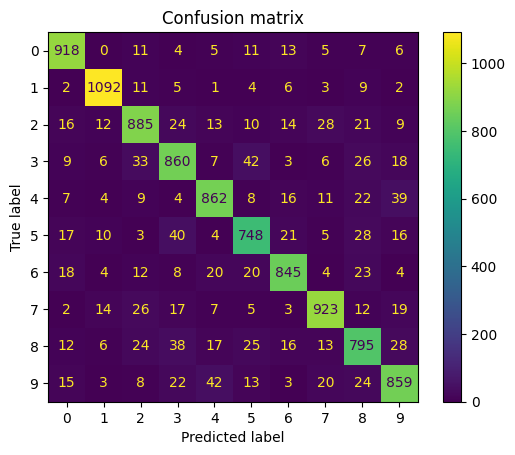

In [12]:
eval(decision_tree_pipeline, x_test, y_test)

In [13]:
bagging_pipeline = Pipeline(steps= [
    ('classifier', BaggingClassifier())
])
train_classifier(bagging_pipeline, x_train, y_train, cv, 'Bagging')

on an avearge, Bagging model has f1 score of 0.943 +/- 0.003 on the training set.


# classification report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.93      0.94      0.93      1010
           4       0.95      0.94      0.95       982
           5       0.93      0.93      0.93       892
           6       0.95      0.95      0.95       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.92      0.93       974
           9       0.94      0.91      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

# confusion matrix is


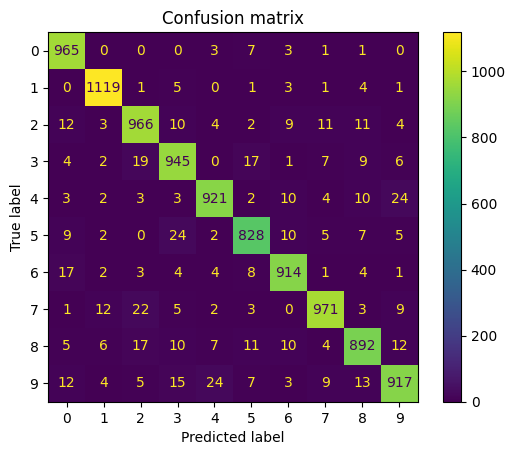

In [14]:
eval(bagging_pipeline, x_test, y_test)